## Code for finetuning basemodel

In [1]:
%run setup.ipynb

## Unfreezing layer 4 of trained basemodel

In [2]:
model, info = load_function("basemodel.tar")

c:\Users\annek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:
epochs = 50
unfreeze_layer4(model)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model, info = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)


Epoch 1/50
----------
Train Loss: 0.1106 Acc: 0.9641
Val Loss: 0.0183 Acc: 1.0000
Epoch time 2m 39s
----------

Epoch 2/50
----------
Train Loss: 0.0384 Acc: 0.9904
Val Loss: 0.8047 Acc: 0.9615
Epoch time 2m 38s
----------

Epoch 3/50
----------
Train Loss: 0.0429 Acc: 0.9952
Val Loss: 0.0597 Acc: 0.9712
Epoch time 2m 29s
----------

Epoch 4/50
----------
Train Loss: 0.0503 Acc: 0.9868
Val Loss: 0.0402 Acc: 0.9712
Epoch time 2m 29s
----------

Epoch 5/50
----------
Train Loss: 0.0204 Acc: 0.9928
Val Loss: 0.0227 Acc: 0.9904
Epoch time 2m 34s
----------

Epoch 6/50
----------
Train Loss: 0.0045 Acc: 1.0000
Val Loss: 0.0062 Acc: 1.0000
Epoch time 2m 38s
----------

Epoch 7/50
----------
Train Loss: 0.0014 Acc: 1.0000
Val Loss: 0.0058 Acc: 1.0000
Epoch time 2m 31s
----------

Epoch 8/50
----------
Train Loss: 0.0012 Acc: 1.0000
Val Loss: 0.0119 Acc: 0.9904
Epoch time 2m 31s
----------

Epoch 9/50
----------
Train Loss: 0.0004 Acc: 1.0000
Val Loss: 0.0029 Acc: 1.0000
Epoch time 2m 31s
----

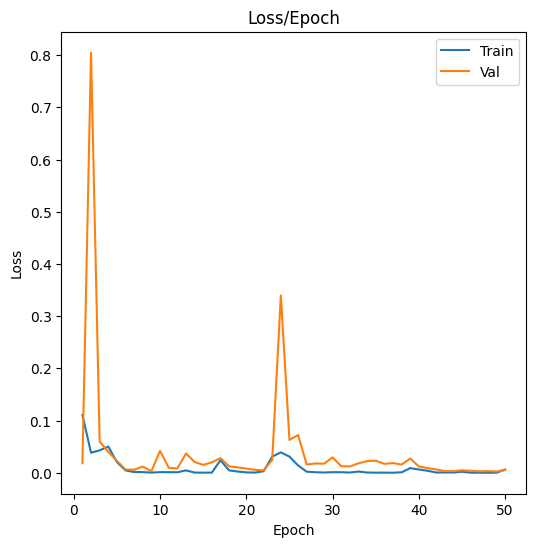

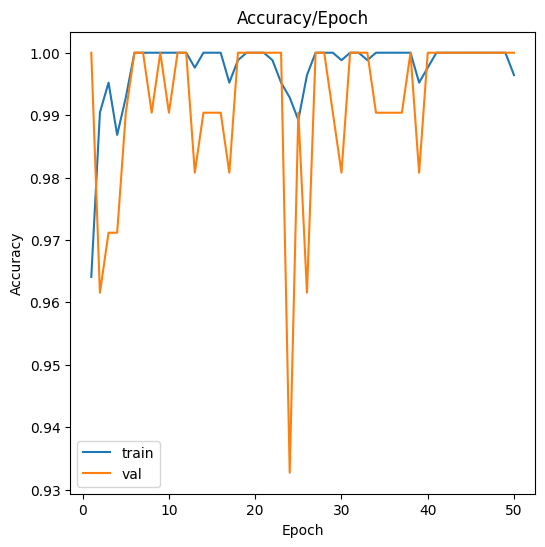

Training accuracies
[0.9640718562874252, 0.9904191616766467, 0.9952095808383233, 0.9868263473053892, 0.9928143712574851, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9976047904191617, 1.0, 1.0, 1.0, 0.9952095808383233, 0.9988023952095808, 1.0, 1.0, 1.0, 0.9988023952095808, 0.9952095808383233, 0.9928143712574851, 0.9892215568862276, 0.9964071856287425, 1.0, 1.0, 1.0, 0.9988023952095808, 1.0, 1.0, 0.9988023952095808, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9952095808383233, 0.9976047904191617, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9964071856287425]
Validation Accuracies
[1.0, 0.9615384615384616, 0.9711538461538461, 0.9711538461538461, 0.9903846153846154, 1.0, 1.0, 0.9903846153846154, 1.0, 0.9903846153846154, 1.0, 1.0, 0.9807692307692307, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9807692307692307, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9326923076923077, 0.9903846153846154, 0.9615384615384616, 1.0, 1.0, 0.9903846153846154, 0.9807692307692307, 1.0, 1.0, 1.0, 0.9903846153846154, 0.990384615

In [6]:
plot_loss(info["train_loss"], info["val_loss"])
plot_accuracies(info["train_acc"], info["val_acc"], ["train", "val"])
print_stats(info)

In [8]:
truel, predl = labels_and_predictions(dataloader_test, model, device)

Accuracy 98.09523809523809
              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.94      1.00      0.97        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.87      0.93        15
       robin       0.94      1.00      0.97        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  1  0 13  1  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]


<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

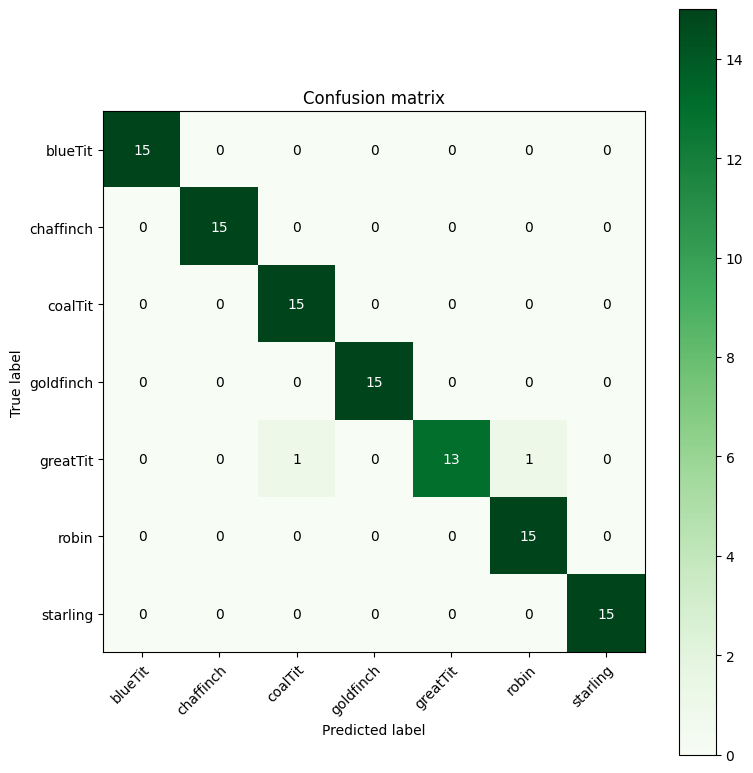

In [9]:
test_acc = (np.sum(predl==truel)/predl.size * 100)
print("Accuracy", test_acc)
print(classification_report(truel, predl, target_names=class_labels))
plot_confusion_matrix(truel, predl, class_labels)

In [10]:
model.eval()
feeder_truel, feeder_predl = labels_and_predictions(dataloader_feeder, model, device)

Accuracy 60.169772531334964
              precision    recall  f1-score   support

     blueTit       0.88      0.21      0.33      2078
   chaffinch       0.87      0.45      0.60      3552
     coalTit       0.66      0.70      0.68      1846
   goldfinch       0.72      0.93      0.81      2000
    greatTit       0.56      0.43      0.49      2033
       robin       0.39      0.73      0.51      1428
    starling       0.49      0.91      0.64      2142

    accuracy                           0.60     15079
   macro avg       0.65      0.62      0.58     15079
weighted avg       0.69      0.60      0.58     15079

[[ 427   61  169   93  501  295  532]
 [   2 1611   91  278   78  950  542]
 [   1  109 1295  135   91   59  156]
 [   0    7    9 1869    6  106    3]
 [  40   33  320  228  880  134  398]
 [   0    0    3    0    1 1043  381]
 [  14   32   64    7    4   73 1948]]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

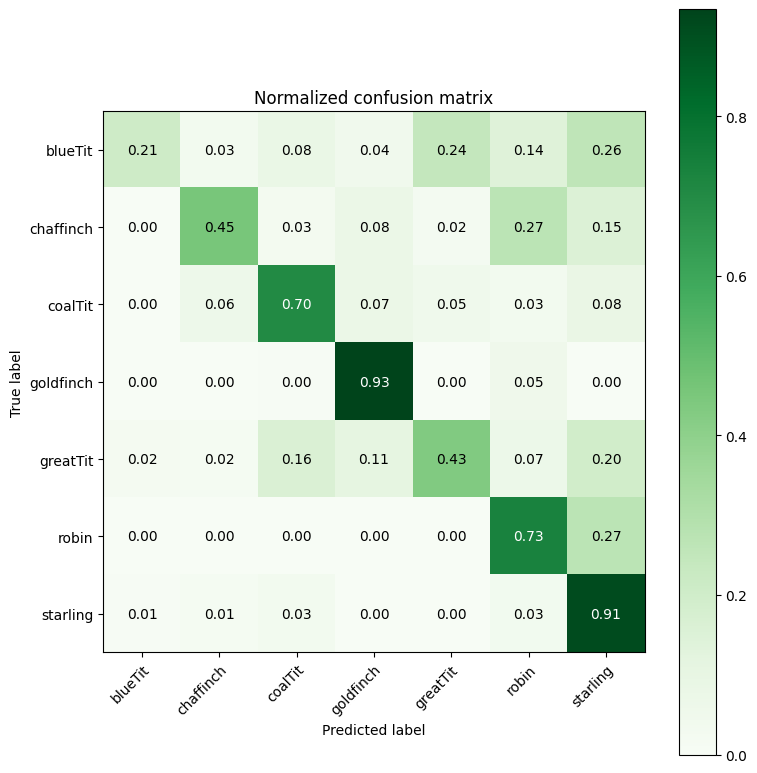

In [11]:
feeder_acc = (np.sum(feeder_predl==feeder_truel)/feeder_predl.size * 100)
print("Accuracy", feeder_acc)
print(classification_report(feeder_truel, feeder_predl, target_names=class_labels))
plot_confusion_matrix(feeder_truel, feeder_predl, class_labels, normalize=True)

In [13]:
save_function("fine_base_50_layer4.tar", model, info, extra_info={"test_acc": test_acc, "feeder_acc": feeder_acc, "optimizer": "Adam with lambda", "note" : "layer4 unfrozen"})

## Running unfreeze layer 4 on model aug 1

In [14]:
model, info = load_function("aug1Model_50.tar", model_key="aug", info_key="aug_info")

c:\Users\annek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [15]:
unfreeze_layer4(model)
epochs=50
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model, info = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/50
----------
Train Loss: 0.1357 Acc: 0.9665
Val Loss: 0.3644 Acc: 0.9038
Epoch time 2m 1s
----------

Epoch 2/50
----------
Train Loss: 0.0380 Acc: 0.9856
Val Loss: 0.0698 Acc: 0.9712
Epoch time 1m 58s
----------

Epoch 3/50
----------
Train Loss: 0.2467 Acc: 0.9868
Val Loss: 0.0917 Acc: 0.9808
Epoch time 1m 58s
----------

Epoch 4/50
----------
Train Loss: 0.0160 Acc: 0.9964
Val Loss: 0.0188 Acc: 1.0000
Epoch time 1m 53s
----------

Epoch 5/50
----------
Train Loss: 0.0044 Acc: 0.9988
Val Loss: 0.0273 Acc: 0.9904
Epoch time 1m 52s
----------

Epoch 6/50
----------
Train Loss: 0.0015 Acc: 1.0000
Val Loss: 0.0074 Acc: 1.0000
Epoch time 1m 56s
----------

Epoch 7/50
----------
Train Loss: 0.0019 Acc: 0.9988
Val Loss: 0.0046 Acc: 1.0000
Epoch time 1m 52s
----------

Epoch 8/50
----------
Train Loss: 0.0019 Acc: 1.0000
Val Loss: 0.0292 Acc: 0.9904
Epoch time 1m 59s
----------

Epoch 9/50
----------
Train Loss: 0.0012 Acc: 1.0000
Val Loss: 0.0014 Acc: 1.0000
Epoch time 1m 53s
-----

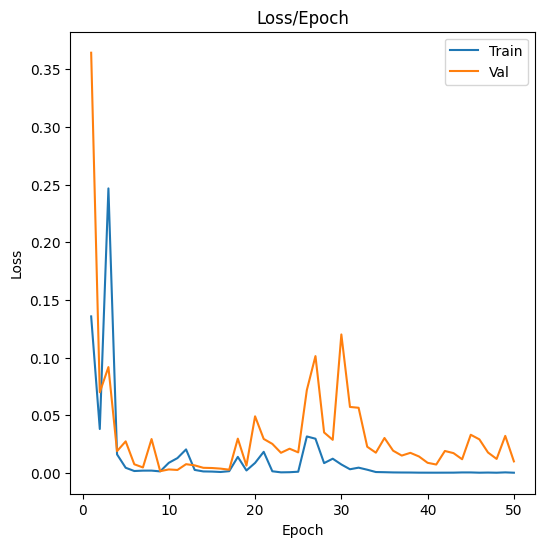

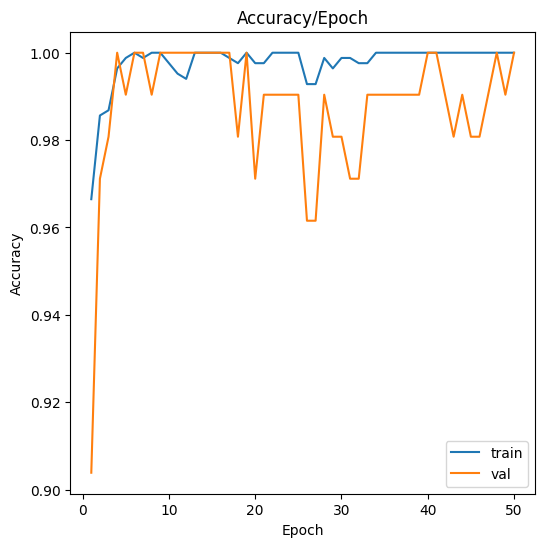

Training accuracies
[0.9664670658682635, 0.98562874251497, 0.9868263473053892, 0.9964071856287425, 0.9988023952095808, 1.0, 0.9988023952095808, 1.0, 1.0, 0.9976047904191617, 0.9952095808383233, 0.9940119760479041, 1.0, 1.0, 1.0, 1.0, 0.9988023952095808, 0.9976047904191617, 1.0, 0.9976047904191617, 0.9976047904191617, 1.0, 1.0, 1.0, 1.0, 0.9928143712574851, 0.9928143712574851, 0.9988023952095808, 0.9964071856287425, 0.9988023952095808, 0.9988023952095808, 0.9976047904191617, 0.9976047904191617, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracies
[0.9038461538461539, 0.9711538461538461, 0.9807692307692307, 1.0, 0.9903846153846154, 1.0, 1.0, 0.9903846153846154, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9807692307692307, 1.0, 0.9711538461538461, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9615384615384616, 0.9615384615384616, 0.9903846153846154, 0.9807692307692307, 0.980769

In [16]:
plot_loss(info["train_loss"], info["val_loss"])
plot_accuracies(info["train_acc"], info["val_acc"], ["train", "val"])
print_stats(info)

Accuracy 96.19047619047619
              precision    recall  f1-score   support

     blueTit       0.94      1.00      0.97        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.88      0.93      0.90        15
   goldfinch       1.00      0.93      0.97        15
    greatTit       1.00      0.87      0.93        15
       robin       0.94      1.00      0.97        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 1  0 14  0  0  0  0]
 [ 0  0  0 14  0  1  0]
 [ 0  0  2  0 13  0  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

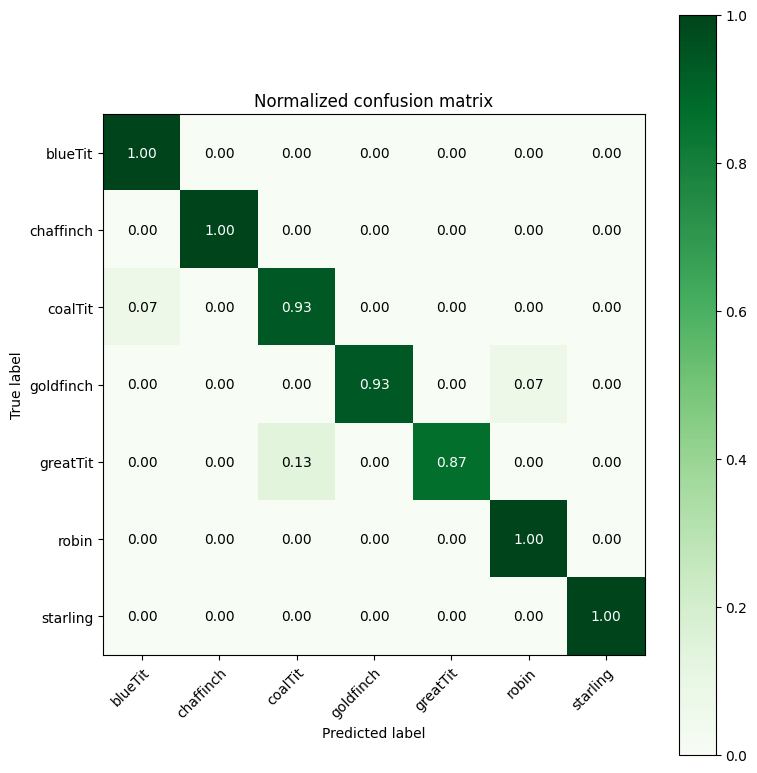

In [17]:
truel, predl = labels_and_predictions(dataloader_test, model, device)
test_acc = (np.sum(predl==truel)/predl.size * 100)
print("Accuracy", test_acc)
print(classification_report(truel, predl, target_names=class_labels))
plot_confusion_matrix(truel, predl, class_labels, normalize=True)

In [18]:
feeder_truel, feeder_predl = labels_and_predictions(dataloader_feeder, model, device)

Accuracy 65.60116718615294
              precision    recall  f1-score   support

     blueTit       0.45      0.66      0.54      2078
   chaffinch       0.93      0.52      0.67      3552
     coalTit       0.77      0.64      0.70      1846
   goldfinch       0.92      0.91      0.91      2000
    greatTit       0.63      0.61      0.62      2033
       robin       0.47      0.32      0.38      1428
    starling       0.55      0.92      0.69      2142

    accuracy                           0.66     15079
   macro avg       0.68      0.65      0.64     15079
weighted avg       0.71      0.66      0.66     15079

[[1377    2   28    5  511   13  142]
 [ 654 1857   23   66   99  256  597]
 [ 422   39 1182   15   78   89   21]
 [  84   21   52 1810    5   28    0]
 [ 430    1  210   10 1245   29  108]
 [  90   66    5   17   38  458  754]
 [  10    3   28   36    3   99 1963]]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

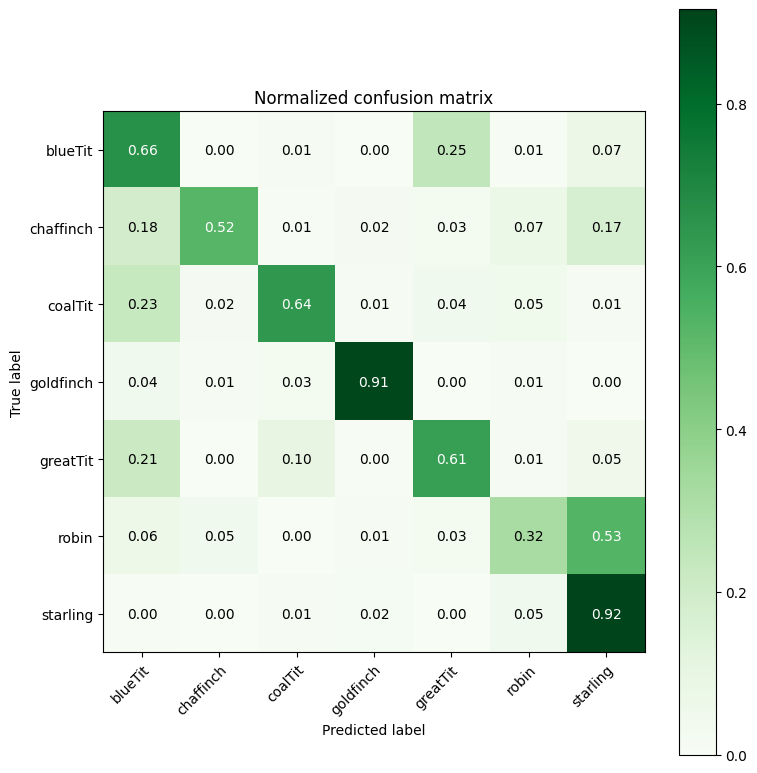

In [19]:
feeder_acc = (np.sum(feeder_predl==feeder_truel)/feeder_predl.size * 100)
print("Accuracy", feeder_acc)
print(classification_report(feeder_truel, feeder_predl, target_names=class_labels))
plot_confusion_matrix(feeder_truel, feeder_predl, class_labels, normalize=True)

In [20]:
save_function("fine_aug_50_layer4.tar", model, info, extra_info={"test_acc": test_acc, "feeder_acc": feeder_acc, "optimizer": "Adam with lambda", "note" : "aug1, layer4 unfrozen"})

## Runnig aug2 just for kicks

In [21]:
model2, info2 = load_function("aug2Model_50.tar", model_key="aug", info_key="aug_info")

c:\Users\annek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [22]:
unfreeze_layer4(model2)
epochs=30
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model2.parameters()), lr=0.001)
model2, info2 = train_model(model2, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

Epoch 1/30
----------
Train Loss: 0.1523 Acc: 0.9605
Val Loss: 6.9858 Acc: 0.6827
Epoch time 2m 19s
----------

Epoch 2/30
----------
Train Loss: 0.0460 Acc: 0.9856
Val Loss: 0.0140 Acc: 1.0000
Epoch time 2m 3s
----------

Epoch 3/30
----------
Train Loss: 0.0141 Acc: 0.9952
Val Loss: 0.0122 Acc: 1.0000
Epoch time 1m 53s
----------

Epoch 4/30
----------
Train Loss: 0.0068 Acc: 0.9976
Val Loss: 0.0208 Acc: 0.9904
Epoch time 1m 55s
----------

Epoch 5/30
----------
Train Loss: 0.0026 Acc: 1.0000
Val Loss: 0.0042 Acc: 1.0000
Epoch time 1m 53s
----------

Epoch 6/30
----------
Train Loss: 0.0039 Acc: 0.9988
Val Loss: 0.0016 Acc: 1.0000
Epoch time 1m 52s
----------

Epoch 7/30
----------
Train Loss: 0.0009 Acc: 1.0000
Val Loss: 0.0077 Acc: 0.9904
Epoch time 1m 52s
----------

Epoch 8/30
----------
Train Loss: 0.0008 Acc: 1.0000
Val Loss: 0.0069 Acc: 1.0000
Epoch time 1m 53s
----------

Epoch 9/30
----------
Train Loss: 0.0250 Acc: 0.9928
Val Loss: 0.0739 Acc: 0.9808
Epoch time 1m 53s
-----

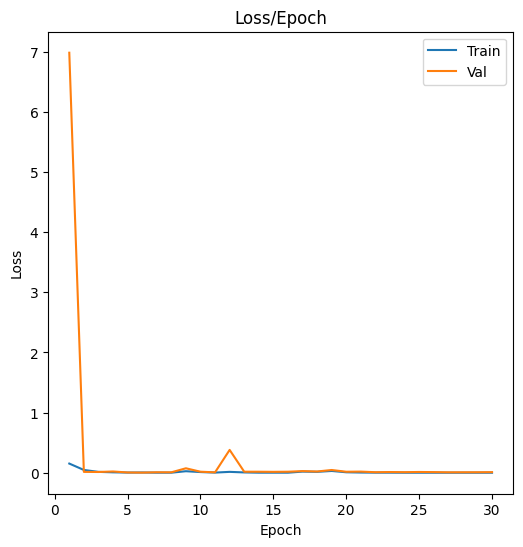

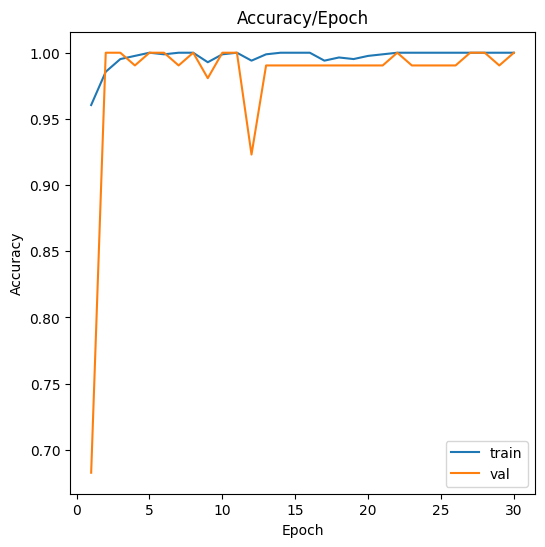

Training accuracies
[0.9604790419161676, 0.98562874251497, 0.9952095808383233, 0.9976047904191617, 1.0, 0.9988023952095808, 1.0, 1.0, 0.9928143712574851, 0.9988023952095808, 1.0, 0.9940119760479041, 0.9988023952095808, 1.0, 1.0, 1.0, 0.9940119760479041, 0.9964071856287425, 0.9952095808383233, 0.9976047904191617, 0.9988023952095808, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracies
[0.6826923076923077, 1.0, 1.0, 0.9903846153846154, 1.0, 1.0, 0.9903846153846154, 1.0, 0.9807692307692307, 1.0, 1.0, 0.9230769230769231, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 1.0, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 1.0, 1.0, 0.9903846153846154, 1.0]
Validation Loss
[6.985781692541563, 0.014009027793200892, 0.012170517378273451, 0.020750774666129682, 0.004159975488549277, 0.0016250162786421312, 0.00769538943887

In [28]:
plot_loss(info2["train_loss"], info2["val_loss"])
plot_accuracies(info2["train_acc"], info2["val_acc"], ["train", "val"])
print_stats(info2)

In [24]:
truel2, predl2 = labels_and_predictions(dataloader_test, model2, device)
test_acc2 = (np.sum(predl2==truel2)/predl2.size * 100)
print("Accuracy", test_acc2)
print(classification_report(truel2, predl2, target_names=class_labels))
# plot_confusion_matrix(truel2, predl2, class_labels, normalize=True)

Accuracy 97.14285714285714
              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       0.94      1.00      0.97        15
     coalTit       0.93      0.93      0.93        15
   goldfinch       1.00      0.93      0.97        15
    greatTit       1.00      0.93      0.97        15
       robin       1.00      1.00      1.00        15
    starling       0.94      1.00      0.97        15

    accuracy                           0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [25]:
feeder_truel2, feeder_predl2 = labels_and_predictions(dataloader_feeder, model2, device)

Accuracy 69.44757609921083
              precision    recall  f1-score   support

     blueTit       0.71      0.35      0.47      2078
   chaffinch       0.82      0.76      0.78      3552
     coalTit       0.76      0.45      0.56      1846
   goldfinch       0.94      0.83      0.88      2000
    greatTit       0.43      0.80      0.56      2033
       robin       0.80      0.59      0.68      1428
    starling       0.68      0.98      0.81      2142

    accuracy                           0.69     15079
   macro avg       0.73      0.68      0.68     15079
weighted avg       0.74      0.69      0.69     15079

[[ 734    5    4   10 1232    4   89]
 [ 122 2687   12   41  271  181  238]
 [  85  267  827   13  471    5  178]
 [   3  238   82 1656    9    0   12]
 [  86   38  151   16 1626   10  106]
 [   0   60    0   19  157  846  346]
 [  11    0   19    3    5    8 2096]]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

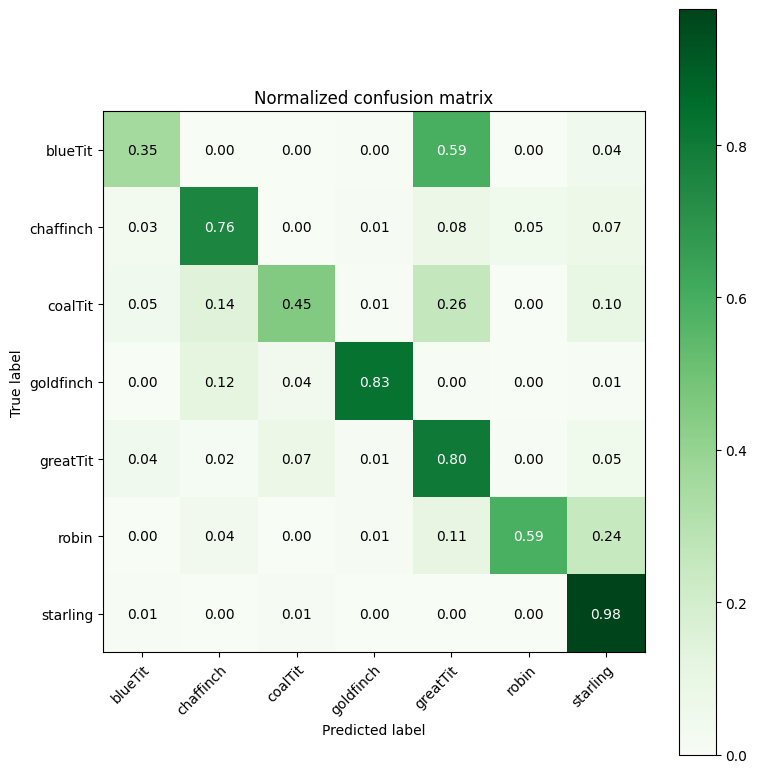

In [26]:
feeder_acc2 = (np.sum(feeder_predl2==feeder_truel2)/feeder_predl2.size * 100)
print("Accuracy", feeder_acc2)
print(classification_report(feeder_truel2, feeder_predl2, target_names=class_labels))
plot_confusion_matrix(feeder_truel2, feeder_predl2, class_labels, normalize=True)

In [27]:
save_function("fine_aug2_30_layer4.tar", model2, info2, extra_info={"test_acc": test_acc2, "feeder_acc": feeder_acc2, "optimizer": "Adam with lambda", "note" : "aug2, layer4 unfrozen"})